CHILDREN ANEMIA DETECTION WHETHER THEY ARE TAKING THE NECESSARY SUPPLEMENTS USING CLASSIFICATION MODEL

Brief explanation of each column:

1. **Age in 5-year groups:** Categorization of respondents' ages into groups, likely with each group representing a 5-year range.

2. **Type of place of residence:** The type of place where the respondent resides, which could be urban, rural, or other categories.

3. **Highest educational level:** The highest level of education attained by the respondent, categorized into different education levels.

4. **Wealth index combined:** An index combining various indicators of wealth to assess the economic status of the household or individual.

5. **Births in the last five years:** The number of births the respondent has had in the last five years.

6. **Age of respondent at 1st birth:** The age of the respondent at the time of their first childbirth.

7. **Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal):** The adjusted hemoglobin level, taking into account factors such as altitude and smoking.

8. **Anemia level:** The level of anemia, a condition characterized by a deficiency of red blood cells or hemoglobin in the blood.

9. **Have mosquito bed net for sleeping (from household questionnaire):** Indicates whether the household has a mosquito bed net for sleeping.

10. **Smokes cigarettes:** Indicates whether the respondent smokes cigarettes.

11. **Current marital status:** The marital status of the respondent at the time of the survey.

12. **Currently residing with husband/partner:** Indicates whether the respondent is currently residing with their husband or partner.

13. **When child put to breast:** Information about the timing of breastfeeding when a child is born.

14. **Had fever in the last two weeks:** Indicates whether the respondent had a fever in the last two weeks.

15. **Hemoglobin level adjusted for altitude (g/dl - 1 decimal):** Hemoglobin level adjusted for altitude, which can affect the oxygen-carrying capacity of the blood.

16. **Anemia level:** The level of anemia based on the adjusted hemoglobin level.

17. **Taking iron pills, sprinkles, or syrup:** Indicates whether the respondent is currently taking iron supplements in the form of pills, sprinkles, or syrup.

These columns collectively provide information about demographic characteristics, health-related variables, and living conditions of the surveyed individuals. Depending on the context of the survey, these features can be used for various analyses, including public health assessments, demographic studies, or research on health-related behaviors and outcomes.

We will start the EDA(Exploratory Data Analysis) process

Loading all the necessary python library packages


In [ ]:
import numpy as np                                        # Implemennts multi-dimensional array and matrices
import pandas as pd                                       # For data manipulation and analysis
import matplotlib.pyplot as plt                           # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                     # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')                           # Ignore warning related to pandas_profiling
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Reading the dataset


In [ ]:
df=pd.read_csv("/content/children anemia.csv")          # This will print the dataset with a named a dataframe as df by using the csv file
df

,Age in 5-year groups,Type of place of residence,Highest educational level,Wealth index combined,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Current marital status,Currently residing with husband/partner,When child put to breast,Had fever in last two weeks,Hemoglobin level adjusted for altitude (g/dl - 1 decimal),Anemia level.1,"Taking iron pills, sprinkles or syrup"
0,40-44,Urban,Higher,Richest,1,22,NaN,NaN,Yes,No,Living with partner,Staying elsewhere,Immediately,No,NaN,NaN,Yes
1,35-39,Urban,Higher,Richest,1,28,NaN,NaN,Yes,No,Married,Living with her,Hours: 1,No,NaN,NaN,No
2,25-29,Urban,Higher,Richest,1,26,NaN,NaN,No,No,Married,Living with her,Immediately,No,NaN,NaN,No
3,25-29,Urban,Secondary,Richest,1,25,95.0,Moderate,Yes,No,Married,Living with her,105.0,No,114.0,Not anemic,No
4,20-24,Urban,Secondary,Richest,1,21,NaN,NaN,Yes,No,No longer living together/separated,NaN,Immediately,No,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33919,35-39,Rural,Secondary,Richer,2,19,120.0,Not anemic,Yes,No,Married,Living with her,NaN,No,120.0,Not anemic,Yes
33920,25-29,Rural,No education,Richer,1,27,120.0,Not anemic,Yes,No,Never in union,NaN,Hours: 1,No,120.0,Not anemic,No
33921,25-29,Rural,Higher,Richer,1,22,149.0,Not anemic,Yes,No,Married,Living with her,Hours: 1,No,119.0,Not anemic,No
33922,20-24,Rural,Secondary,Richer,1,21,123.0,Not anemic,Yes,No,Married,Living with her,Immediately,No,75.0,Moderate,Yes


After reading the dataset thoroughly, we will start with the data profiling


In [ ]:
df.columns                        # This will print the names of all columns

Index(['Age in 5-year groups', 'Type of place of residence',
       'Highest educational level', 'Wealth index combined',
       'Births in last five years', 'Age of respondent at 1st birth',
       'Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)',
       'Anemia level',
       'Have mosquito bed net for sleeping (from household questionnaire)',
       'Smokes cigarettes', 'Current marital status',
       'Currently residing with husband/partner', 'When child put to breast',
       'Had fever in last two weeks',
       'Hemoglobin level adjusted for altitude (g/dl - 1 decimal)',
       'Anemia level.1', 'Taking iron pills, sprinkles or syrup'],
      dtype='object')

In [ ]:
df.head()                         # This will print the first n rows of the dataframe df

,Age in 5-year groups,Type of place of residence,Highest educational level,Wealth index combined,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Current marital status,Currently residing with husband/partner,When child put to breast,Had fever in last two weeks,Hemoglobin level adjusted for altitude (g/dl - 1 decimal),Anemia level.1,"Taking iron pills, sprinkles or syrup"
0,40-44,Urban,Higher,Richest,1,22,NaN,NaN,Yes,No,Living with partner,Staying elsewhere,Immediately,No,NaN,NaN,Yes
1,35-39,Urban,Higher,Richest,1,28,NaN,NaN,Yes,No,Married,Living with her,Hours: 1,No,NaN,NaN,No
2,25-29,Urban,Higher,Richest,1,26,NaN,NaN,No,No,Married,Living with her,Immediately,No,NaN,NaN,No
3,25-29,Urban,Secondary,Richest,1,25,95.0,Moderate,Yes,No,Married,Living with her,105.0,No,114.0,Not anemic,No
4,20-24,Urban,Secondary,Richest,1,21,NaN,NaN,Yes,No,No longer living together/separated,NaN,Immediately,No,NaN,NaN,No


In [ ]:
df.tail()                        # This will print the last n rows of the dataframe df

,Age in 5-year groups,Type of place of residence,Highest educational level,Wealth index combined,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Current marital status,Currently residing with husband/partner,When child put to breast,Had fever in last two weeks,Hemoglobin level adjusted for altitude (g/dl - 1 decimal),Anemia level.1,"Taking iron pills, sprinkles or syrup"
33919,35-39,Rural,Secondary,Richer,2,19,120.0,Not anemic,Yes,No,Married,Living with her,NaN,No,120.0,Not anemic,Yes
33920,25-29,Rural,No education,Richer,1,27,120.0,Not anemic,Yes,No,Never in union,NaN,Hours: 1,No,120.0,Not anemic,No
33921,25-29,Rural,Higher,Richer,1,22,149.0,Not anemic,Yes,No,Married,Living with her,Hours: 1,No,119.0,Not anemic,No
33922,20-24,Rural,Secondary,Richer,1,21,123.0,Not anemic,Yes,No,Married,Living with her,Immediately,No,75.0,Moderate,Yes
33923,40-44,Rural,Secondary,Richest,1,35,NaN,NaN,No,No,Married,Living with her,Immediately,NaN,NaN,NaN,NaN


In [ ]:
df.sample(5)                     # This will print the n=5 random sample records of the dataframe df

,Age in 5-year groups,Type of place of residence,Highest educational level,Wealth index combined,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Current marital status,Currently residing with husband/partner,When child put to breast,Had fever in last two weeks,Hemoglobin level adjusted for altitude (g/dl - 1 decimal),Anemia level.1,"Taking iron pills, sprinkles or syrup"
9484,25-29,Urban,Higher,Richest,1,26,116.0,Mild,Yes,No,Married,Staying elsewhere,Immediately,Yes,101.0,Mild,No
17101,40-44,Rural,No education,Poorer,2,22,NaN,NaN,Yes,No,Married,Living with her,NaN,No,NaN,NaN,No
1961,25-29,Rural,Primary,Middle,3,20,NaN,NaN,Yes,No,Married,Living with her,102.0,No,NaN,NaN,No
16332,15-19,Urban,No education,Richer,2,17,116.0,Mild,Yes,No,Married,Living with her,Immediately,No,NaN,NaN,No
22558,30-34,Rural,No education,Poorest,3,15,NaN,NaN,Yes,No,Married,Living with her,NaN,No,NaN,NaN,No


In [ ]:
df.info()                               # This will give the index, datatype and memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33924 entries, 0 to 33923
Data columns (total 17 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Age in 5-year groups                                                   33924 non-null  object 
 1   Type of place of residence                                             33924 non-null  object 
 2   Highest educational level                                              33924 non-null  object 
 3   Wealth index combined                                                  33924 non-null  object 
 4   Births in last five years                                              33924 non-null  int64  
 5   Age of respondent at 1st birth                                         33924 non-null  int64  
 6   Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)  13136 non-null 

In [ ]:
df.describe()                            # This will print the descriptive statistics of the dataframe df such as count, mean, standard deviation, minimum, maximum.

,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Hemoglobin level adjusted for altitude (g/dl - 1 decimal)
count,33924.000000,33924.000000,13136.000000,10182.000000
mean,1.823783,19.570776,114.367235,101.270183
std,0.705460,4.313172,15.915408,15.569583
min,1.000000,12.000000,20.000000,29.000000
25%,1.000000,16.000000,105.000000,92.000000
50%,2.000000,19.000000,115.000000,103.000000
75%,2.000000,22.000000,125.000000,112.000000
max,6.000000,48.000000,218.000000,170.000000


In [ ]:
df.describe(include='all')              # This will print the descriptive statistics of both numerical and categorical columns of the dataframe df such as count, mean, standard deviation, minimum, maximum.

,Age in 5-year groups,Type of place of residence,Highest educational level,Wealth index combined,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Current marital status,Currently residing with husband/partner,When child put to breast,Had fever in last two weeks,Hemoglobin level adjusted for altitude (g/dl - 1 decimal),Anemia level.1,"Taking iron pills, sprinkles or syrup"
count,33924,33924,33924,33924,33924.000000,33924.000000,13136.000000,13136,33924,33924,33924,32226,21168,30713,10182.000000,10182,30713
unique,7,2,4,5,NaN,NaN,NaN,4,2,2,6,2,41,3,NaN,4,3
top,25-29,Rural,No education,Poorest,NaN,NaN,NaN,Not anemic,Yes,No,Married,Living with her,Immediately,No,NaN,Moderate,No
freq,9470,22225,15391,8066,NaN,NaN,NaN,5337,24016,33852,31222,29619,9351,23065,NaN,3927,25358
mean,NaN,NaN,NaN,NaN,1.823783,19.570776,114.367235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.270183,NaN,NaN
std,NaN,NaN,NaN,NaN,0.705460,4.313172,15.915408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.569583,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,12.000000,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.000000,16.000000,105.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,2.000000,19.000000,115.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,2.000000,22.000000,125.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.000000,NaN,NaN


In [ ]:
df.shape     #This attribute returns a tuple representing the dimensionality of the dataframe df which contains the number of rows followed by the number of columns.

(33924, 17)

In [ ]:
df.size      # This attribute returns the total number of elements in the dataframe df, which is equal to the product of the number of rows and the number of columns.

576708

In [ ]:
df.dtypes    #  This attribute returns the data type of each column in the dataframe df.

Age in 5-year groups                                                      object
Type of place of residence                                                object
Highest educational level                                                 object
Wealth index combined                                                     object
Births in last five years                                                  int64
Age of respondent at 1st birth                                             int64
Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)    float64
Anemia level                                                              object
Have mosquito bed net for sleeping (from household questionnaire)         object
Smokes cigarettes                                                         object
Current marital status                                                    object
Currently residing with husband/partner                                   object
When child put to breast    

In [ ]:
df.isnull()                        # This method is used to check for missing of null values in the dataframe df and returns a boolean mask indicating where the missing values are located in each column.

,Age in 5-year groups,Type of place of residence,Highest educational level,Wealth index combined,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Current marital status,Currently residing with husband/partner,When child put to breast,Had fever in last two weeks,Hemoglobin level adjusted for altitude (g/dl - 1 decimal),Anemia level.1,"Taking iron pills, sprinkles or syrup"
0,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,False,False,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33919,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
33920,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
33921,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
33922,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()            # This method  is used to count the number of missing values in each column of the dataframe df. It first calls .isnull() to create a boolean mask and then sums the number of True values (which represent missing values) for each column providing a quick way to see how many missing values exist in each column.

Age in 5-year groups                                                         0
Type of place of residence                                                   0
Highest educational level                                                    0
Wealth index combined                                                        0
Births in last five years                                                    0
Age of respondent at 1st birth                                               0
Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)    20788
Anemia level                                                             20788
Have mosquito bed net for sleeping (from household questionnaire)            0
Smokes cigarettes                                                            0
Current marital status                                                       0
Currently residing with husband/partner                                   1698
When child put to breast                            

After applying the .isnull().sum() command, we can see that there are null values in 8 columns of the dataframe df

In [ ]:
#Filling NAN values with Median
df['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)'] = df['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)'].median()
df['Hemoglobin level adjusted for altitude (g/dl - 1 decimal)'] = df['Hemoglobin level adjusted for altitude (g/dl - 1 decimal)'].fillna(df['Hemoglobin level adjusted for altitude (g/dl - 1 decimal)'].median())

In [ ]:
df = df[df["Anemia level.1"].notna()]
df = df[df["Currently residing with husband/partner"].notna()]

In [ ]:
df = df.reset_index()

In [ ]:
df = df.drop(["index"], axis=1)

In [ ]:
#filling the missing values with mode

df['Currently residing with husband/partner'].fillna(df['Currently residing with husband/partner'].mode()[0], inplace=True)
df['Anemia level.1'].fillna(df['Anemia level.1'].mode()[0], inplace=True)
df['Type of place of residence'].fillna(df['Type of place of residence'].mode()[0], inplace=True)
df['Anemia level'].fillna(df['Anemia level'].mode()[0], inplace=True)
df['When child put to breast'].fillna(df['When child put to breast'].mode()[0], inplace=True)

In [ ]:
df['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)'].unique()

array([115.])

In [ ]:
df.isnull().sum()

Age in 5-year groups                                                     0
Type of place of residence                                               0
Highest educational level                                                0
Wealth index combined                                                    0
Births in last five years                                                0
Age of respondent at 1st birth                                           0
Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)    0
Anemia level                                                             0
Have mosquito bed net for sleeping (from household questionnaire)        0
Smokes cigarettes                                                        0
Current marital status                                                   0
Currently residing with husband/partner                                  0
When child put to breast                                                 0
Had fever in last two wee

In [ ]:
df.shape

(9664, 17)

In [ ]:
df1=df.columns
df1

Index(['Age in 5-year groups', 'Type of place of residence',
       'Highest educational level', 'Wealth index combined',
       'Births in last five years', 'Age of respondent at 1st birth',
       'Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)',
       'Anemia level',
       'Have mosquito bed net for sleeping (from household questionnaire)',
       'Smokes cigarettes', 'Current marital status',
       'Currently residing with husband/partner', 'When child put to breast',
       'Had fever in last two weeks',
       'Hemoglobin level adjusted for altitude (g/dl - 1 decimal)',
       'Anemia level.1', 'Taking iron pills, sprinkles or syrup'],
      dtype='object')

So, we have filled the null/missing values in each column of the dataframe df. Now, we will move on to the next process : Data Visualization

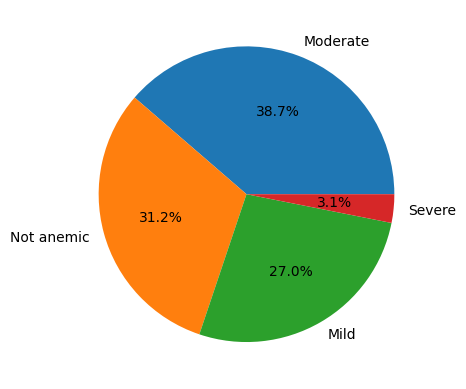

In [ ]:
plt.pie(df["Anemia level.1"].value_counts().values, labels=df["Anemia level.1"].value_counts().index, autopct="%1.1f%%")
plt.show()

<Axes: ylabel='Births in last five years'>

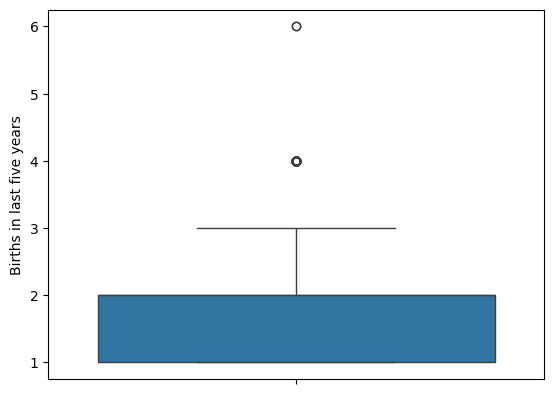

In [ ]:
sns.boxplot(df['Births in last five years'])

In [ ]:
df['Births in last five years'].value_counts()

2    5153
1    3282
3    1141
4      86
6       2
Name: Births in last five years, dtype: int64

<Axes: ylabel='Age of respondent at 1st birth'>

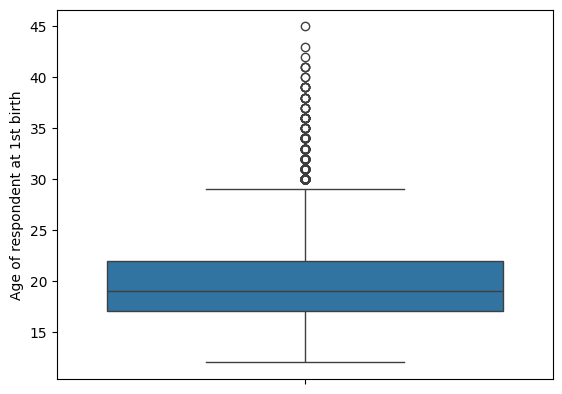

In [ ]:
sns.boxplot(df['Age of respondent at 1st birth'])

In [ ]:
df['Age of respondent at 1st birth'].value_counts()

17    1060
18    1004
16     992
20     896
19     859
21     672
15     663
22     583
23     470
24     444
14     337
25     310
26     269
27     225
28     150
13     148
29     138
30     113
12      85
31      78
32      55
34      33
33      30
36      14
35      10
38       7
39       6
37       5
41       3
40       2
45       1
43       1
42       1
Name: Age of respondent at 1st birth, dtype: int64

<Axes: ylabel='Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)'>

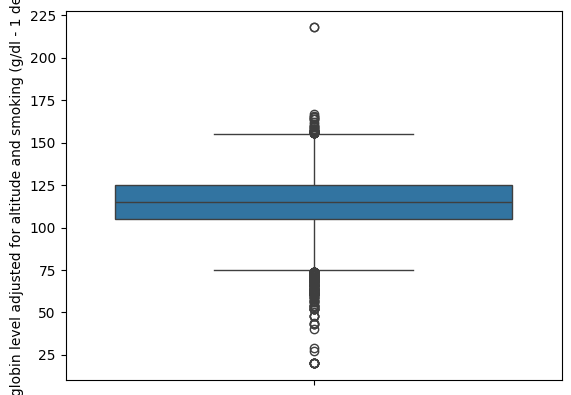

In [ ]:
sns.boxplot(df['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)'])

In [ ]:
df['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)'].value_counts()

113.0    400
116.0    375
112.0    372
108.0    367
111.0    361
        ... 
44.0       1
27.0       1
166.0      1
53.0       1
162.0      1
Name: Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal), Length: 123, dtype: int64

<Axes: ylabel='Hemoglobin level adjusted for altitude (g/dl - 1 decimal)'>

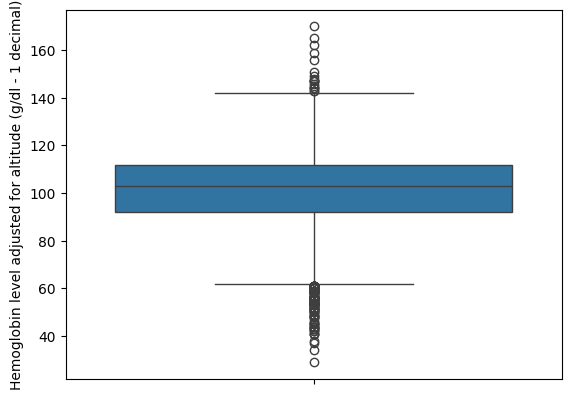

In [ ]:
sns.boxplot(df['Hemoglobin level adjusted for altitude (g/dl - 1 decimal)'])

In [ ]:
df['Hemoglobin level adjusted for altitude (g/dl - 1 decimal)'].value_counts()

102.0    294
108.0    287
104.0    282
109.0    260
98.0     258
        ... 
159.0      1
34.0       1
148.0      1
151.0      1
145.0      1
Name: Hemoglobin level adjusted for altitude (g/dl - 1 decimal), Length: 119, dtype: int64

In [ ]:
df['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)'].nunique()

1

Our dataset is unbalanced. So,we need to balance the dataset.

In [ ]:
df.columns

Index(['Age in 5-year groups', 'Type of place of residence',
       'Highest educational level', 'Wealth index combined',
       'Births in last five years', 'Age of respondent at 1st birth',
       'Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)',
       'Anemia level',
       'Have mosquito bed net for sleeping (from household questionnaire)',
       'Smokes cigarettes', 'Current marital status',
       'Currently residing with husband/partner', 'When child put to breast',
       'Had fever in last two weeks',
       'Hemoglobin level adjusted for altitude (g/dl - 1 decimal)',
       'Anemia level.1', 'Taking iron pills, sprinkles or syrup'],
      dtype='object')

In [ ]:
df.corr()

,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Hemoglobin level adjusted for altitude (g/dl - 1 decimal)
Births in last five years,1.000000,-0.052596,-0.002712,-0.025979
Age of respondent at 1st birth,-0.052596,1.000000,0.066108,0.148842
Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),-0.002712,0.066108,1.000000,0.202121
Hemoglobin level adjusted for altitude (g/dl - 1 decimal),-0.025979,0.148842,0.202121,1.000000


<Axes: >

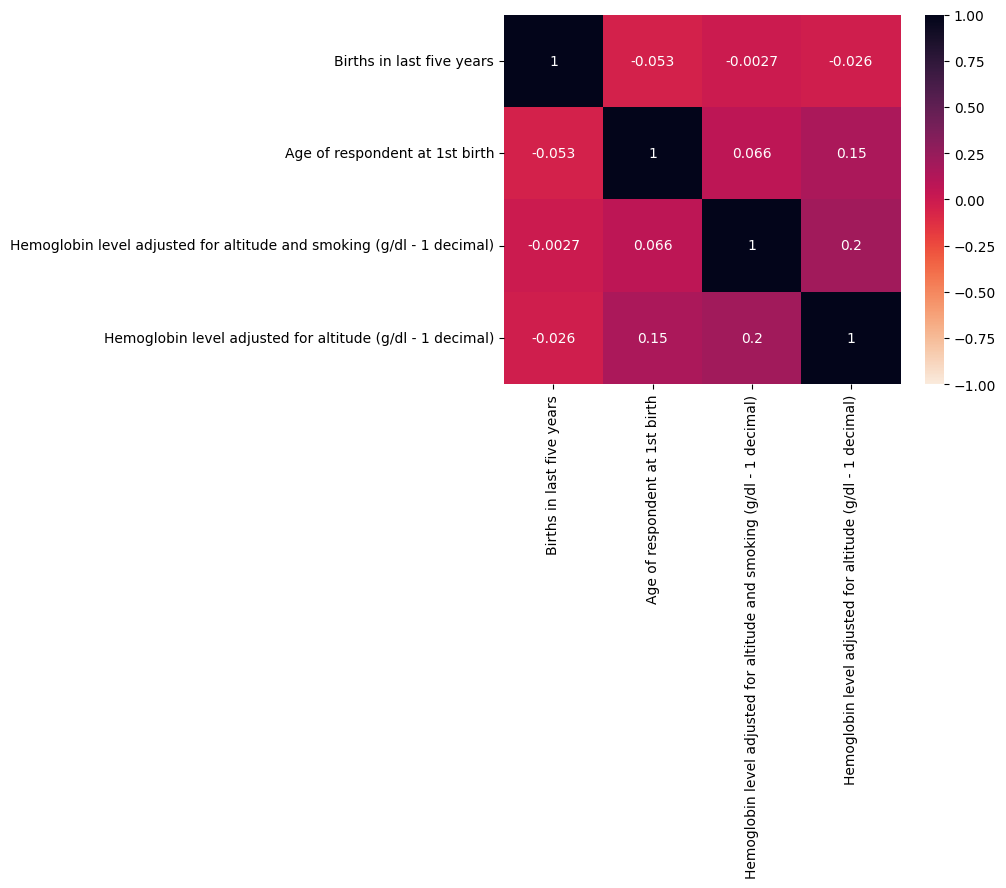

In [ ]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='rocket_r')

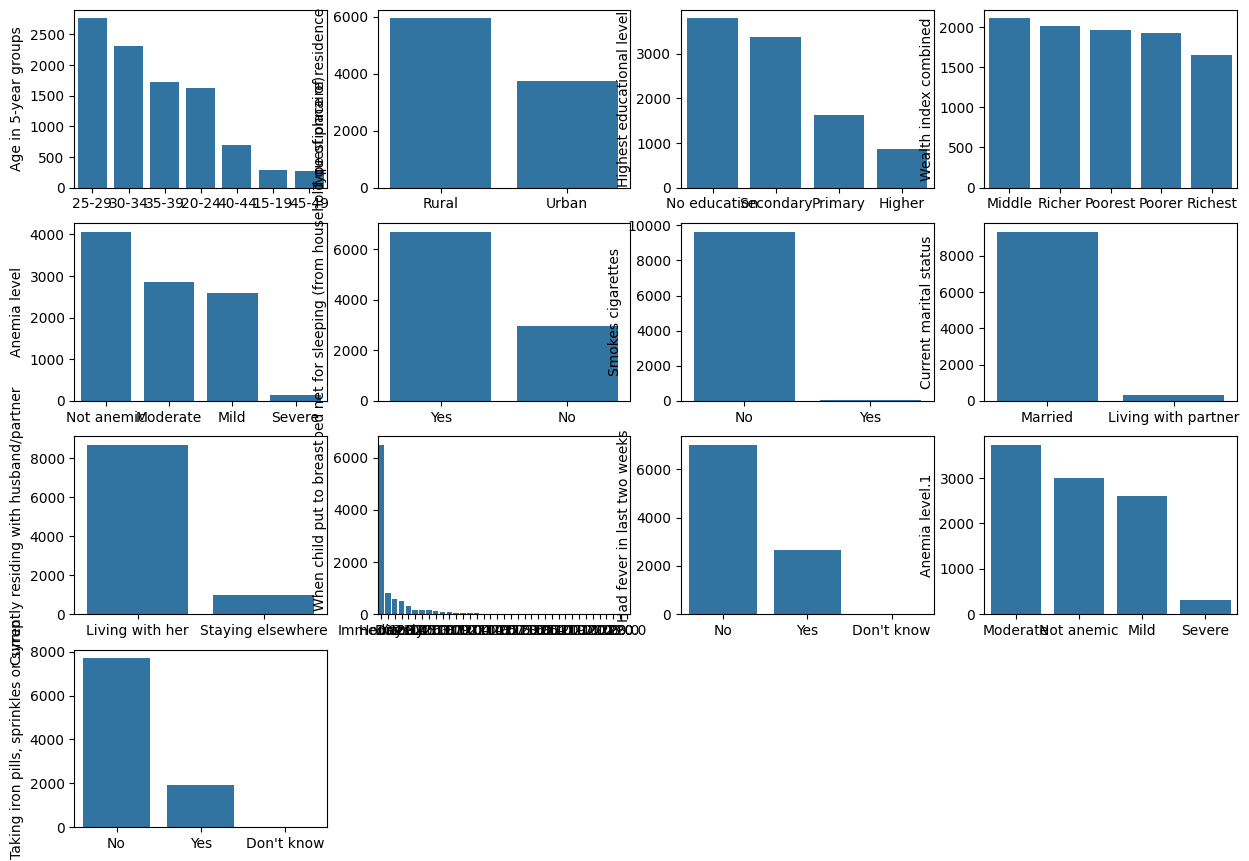

In [ ]:
obj=(df.dtypes=='object')
object_cols=list(obj[obj].index)
plt.figure(figsize=(15,30))
index=1
for col in object_cols:
  y=df[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=0)
  sns.barplot(x=list(y.index),y=y)
  index+=1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9664 entries, 0 to 9663
Data columns (total 17 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Age in 5-year groups                                                   9664 non-null   object 
 1   Type of place of residence                                             9664 non-null   object 
 2   Highest educational level                                              9664 non-null   object 
 3   Wealth index combined                                                  9664 non-null   object 
 4   Births in last five years                                              9664 non-null   int64  
 5   Age of respondent at 1st birth                                         9664 non-null   int64  
 6   Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)  9664 non-null   f

Text(0.5, 1.0, 'analysis based on Hemoglobin level')

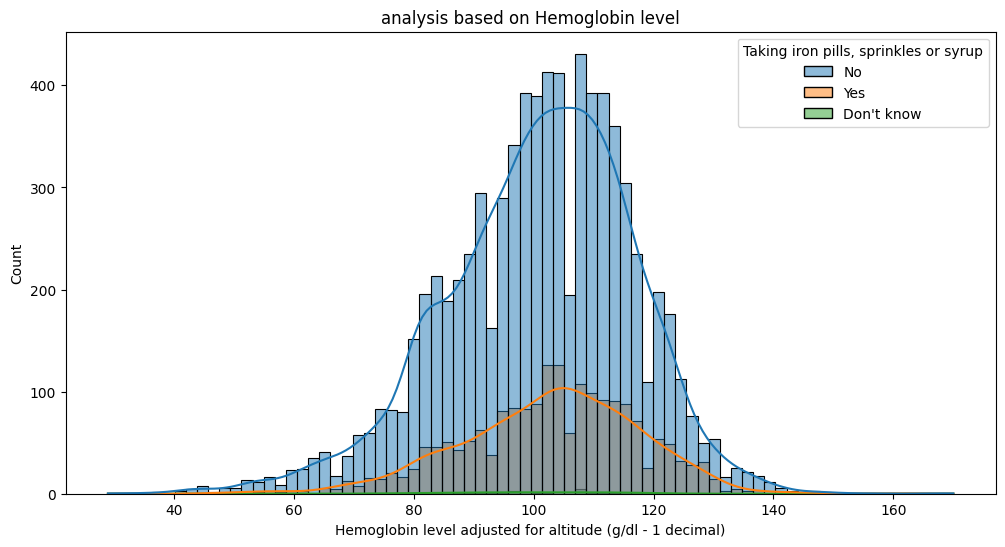

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(x=df['Hemoglobin level adjusted for altitude (g/dl - 1 decimal)'],hue=df['Taking iron pills, sprinkles or syrup'],kde=True)
plt.title('analysis based on Hemoglobin level')

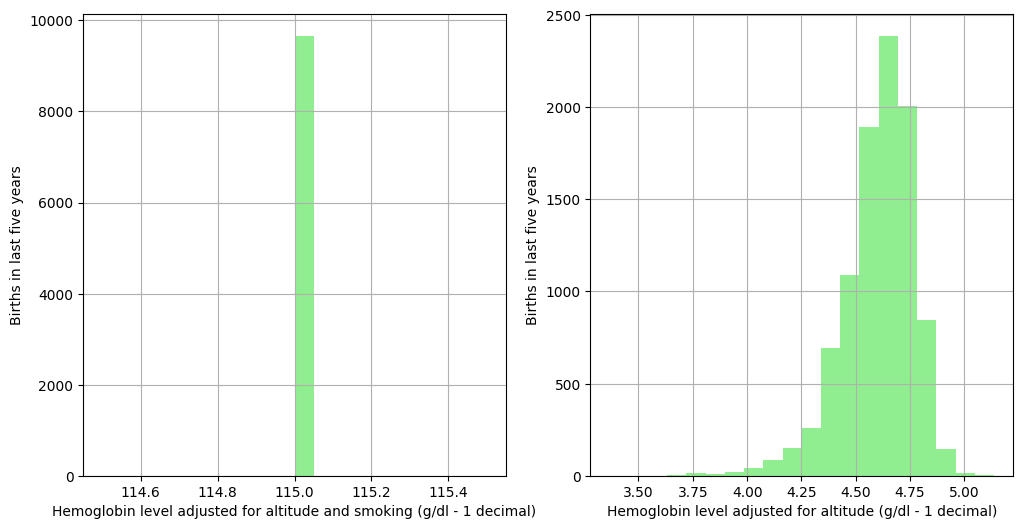

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
df['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)'].hist(bins=20,color='Lightgreen')
plt.xlabel('Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)')
plt.ylabel('Births in last five years')
plt.savefig("hist_plot.png")
plt.subplot(1,2,2)
df['Hemoglobin level adjusted for altitude (g/dl - 1 decimal)']=np.log(df['Hemoglobin level adjusted for altitude (g/dl - 1 decimal)'])
df['Hemoglobin level adjusted for altitude (g/dl - 1 decimal)'].hist(bins=20,color='Lightgreen')
plt.xlabel('Hemoglobin level adjusted for altitude (g/dl - 1 decimal)')
plt.ylabel('Births in last five years')
plt.savefig("hist_plot.png")

<Axes: xlabel='Anemia level', ylabel='count'>

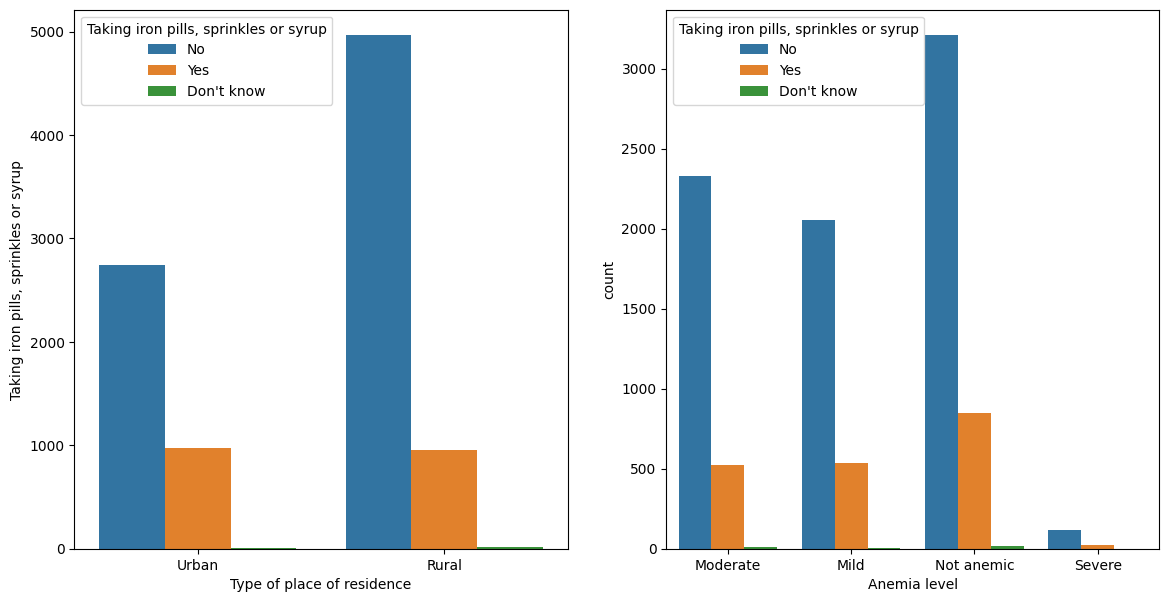

In [ ]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
sns.countplot(x='Type of place of residence', hue='Taking iron pills, sprinkles or syrup', data=df)
plt.xlabel('Type of place of residence')
plt.ylabel('Taking iron pills, sprinkles or syrup')
plt.subplot(1,2,2)
sns.countplot(x='Anemia level',hue='Taking iron pills, sprinkles or syrup',data=df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9664 entries, 0 to 9663
Data columns (total 17 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Age in 5-year groups                                                   9664 non-null   object 
 1   Type of place of residence                                             9664 non-null   object 
 2   Highest educational level                                              9664 non-null   object 
 3   Wealth index combined                                                  9664 non-null   object 
 4   Births in last five years                                              9664 non-null   int64  
 5   Age of respondent at 1st birth                                         9664 non-null   int64  
 6   Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)  9664 non-null   f

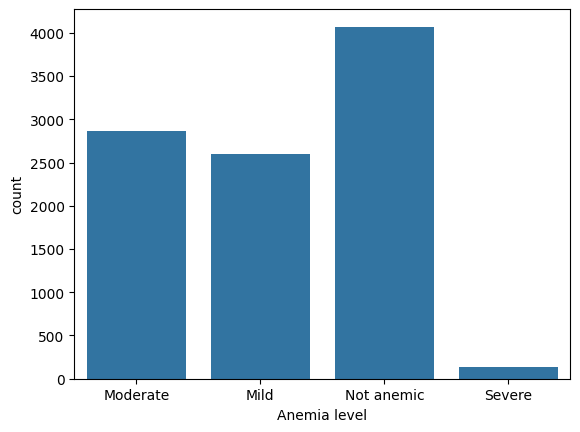

In [ ]:
#countplot of the 'Anemia level' column
sns.countplot(x='Anemia level', data=df)
plt.show()

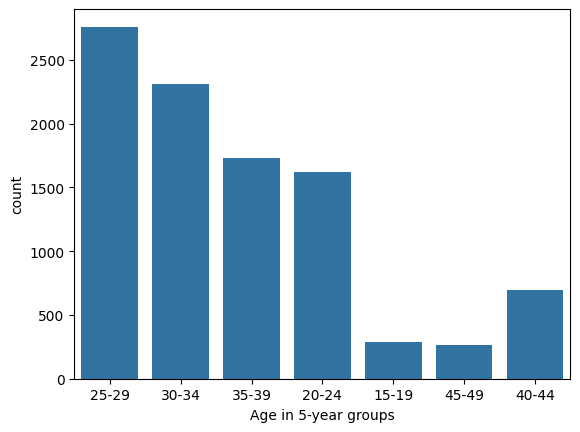

In [ ]:
 #countplot of the 'Age in 5-year groups' column
sns.countplot(x='Age in 5-year groups', data=df)
plt.show()

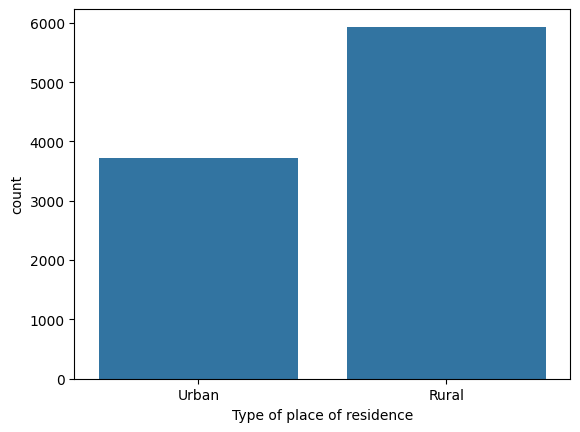

In [ ]:
#countplot of the 'Type of place of residence' column
sns.countplot(x='Type of place of residence', data=df)
plt.show()

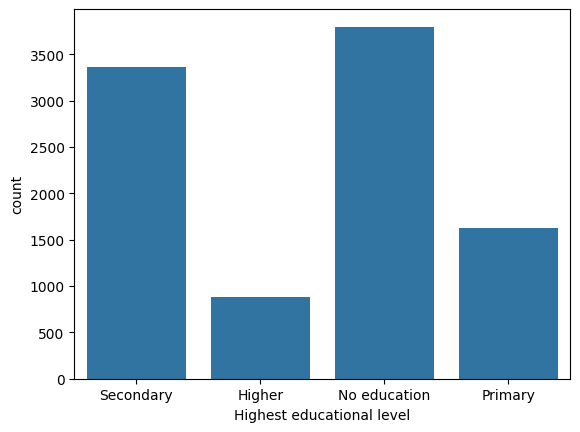

In [ ]:
#countplot of the 'Highest educational level' column
sns.countplot(x='Highest educational level', data=df)
plt.show()

The dataset is imbalanced. So,we will appy SMOTE technique.
Let's convert our catergorical data to numerical using label encoding

In [ ]:
df.columns

Index(['Age in 5-year groups', 'Type of place of residence',
       'Highest educational level', 'Wealth index combined',
       'Births in last five years', 'Age of respondent at 1st birth',
       'Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)',
       'Anemia level',
       'Have mosquito bed net for sleeping (from household questionnaire)',
       'Smokes cigarettes', 'Current marital status',
       'Currently residing with husband/partner', 'When child put to breast',
       'Had fever in last two weeks',
       'Hemoglobin level adjusted for altitude (g/dl - 1 decimal)',
       'Anemia level.1', 'Taking iron pills, sprinkles or syrup'],
      dtype='object')

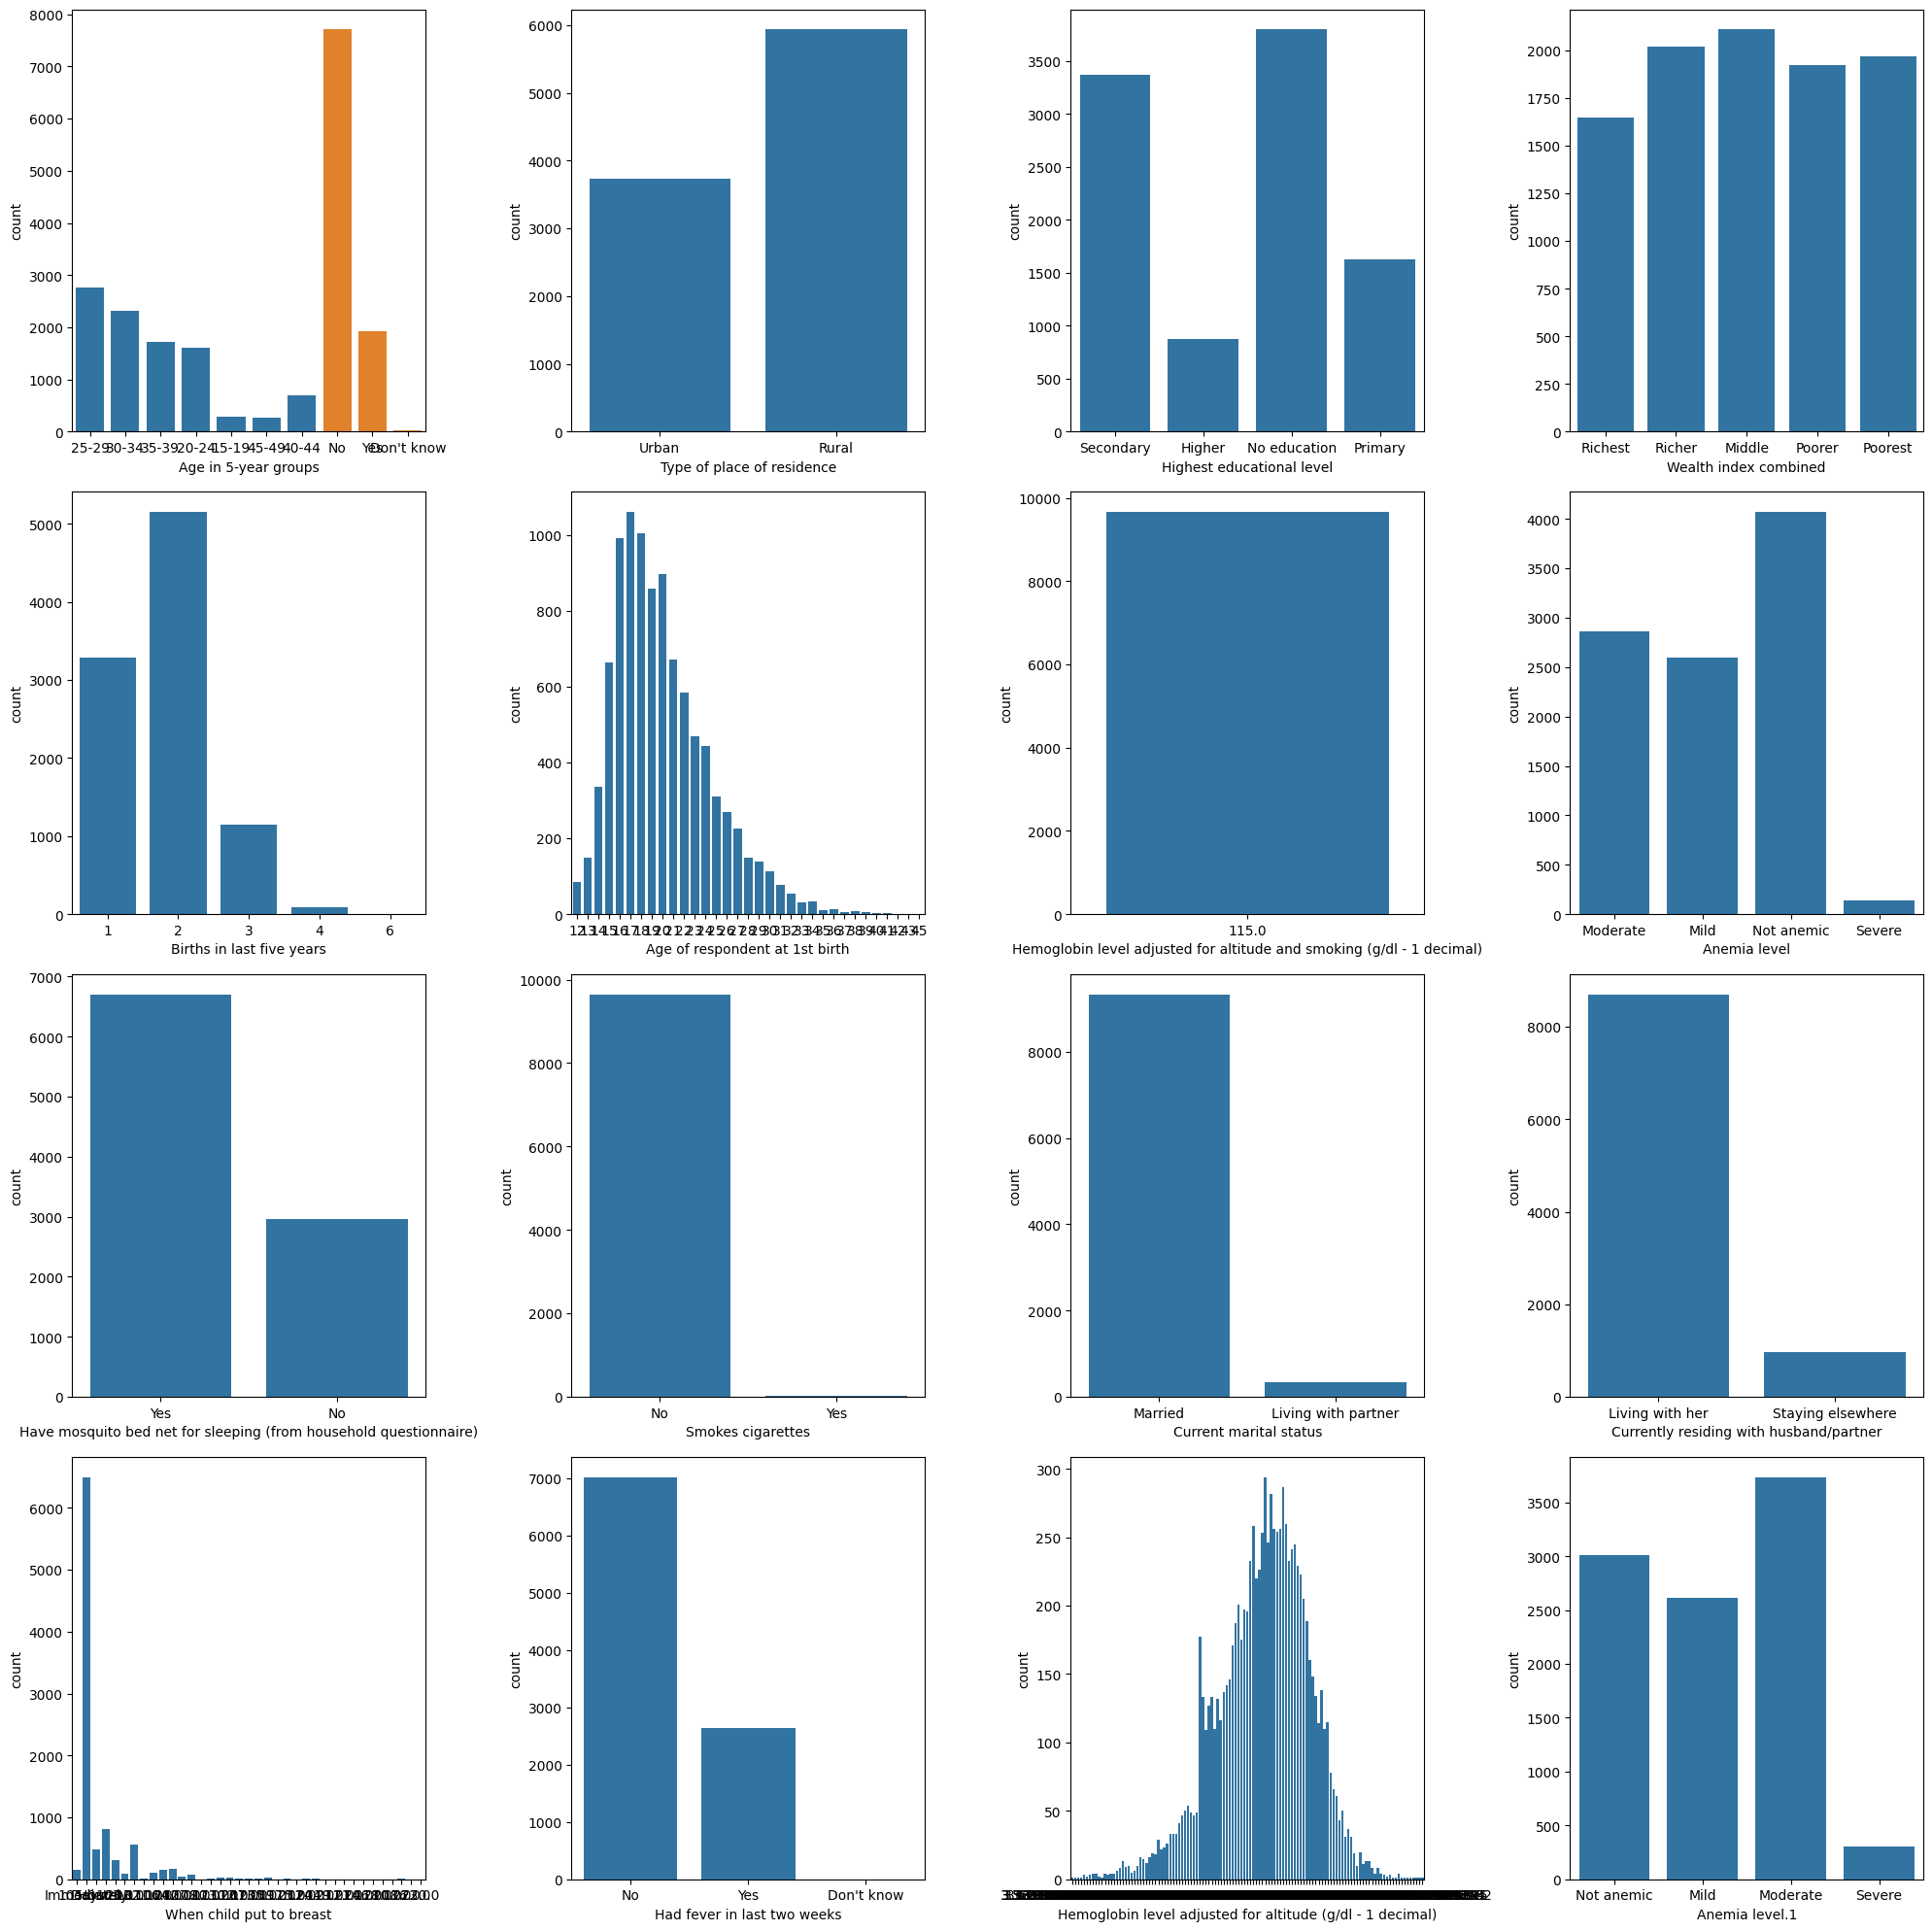

In [ ]:
count=0
fig, ax=plt.subplots(4,4,figsize=(20,20))
ax=ax.flatten()
for i in df.columns:
    sns.countplot(df,x=i,ax=ax[count%len(ax)])
    count+=1
plt.tight_layout()

In [ ]:
df.dtypes

Age in 5-year groups                                                      object
Type of place of residence                                                object
Highest educational level                                                 object
Wealth index combined                                                     object
Births in last five years                                                  int64
Age of respondent at 1st birth                                             int64
Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)    float64
Anemia level                                                              object
Have mosquito bed net for sleeping (from household questionnaire)         object
Smokes cigarettes                                                         object
Current marital status                                                    object
Currently residing with husband/partner                                   object
When child put to breast    

In [ ]:
df.drop(columns=['Age in 5-year groups'], inplace=True)

In [ ]:
df.dtypes

Type of place of residence                                                object
Highest educational level                                                 object
Wealth index combined                                                     object
Births in last five years                                                  int64
Age of respondent at 1st birth                                             int64
Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)    float64
Anemia level                                                              object
Have mosquito bed net for sleeping (from household questionnaire)         object
Smokes cigarettes                                                         object
Current marital status                                                    object
Currently residing with husband/partner                                   object
When child put to breast                                                  object
Had fever in last two weeks 

In [ ]:
target_count = df ['Taking iron pills, sprinkles or syrup'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('class 2:', target_count[2])
print('Proportion of class 0 is ', round(target_count[0] * 100 / (target_count[1] + target_count[0]), 2),'%')
print('Proportion of class 1 is ', round(target_count[1] * 100 / (target_count[0] + target_count[1]), 2),'%')

Class 0: 7707
Class 1: 1928
class 2: 29
Proportion of class 0 is  79.99 %
Proportion of class 1 is  20.01 %


In [ ]:
#label encoding

le = LabelEncoder()
for column in df.select_dtypes(include='object'):
  df[column] = le.fit_transform(df[column])
df.head()


,Type of place of residence,Highest educational level,Wealth index combined,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Current marital status,Currently residing with husband/partner,When child put to breast,Had fever in last two weeks,Hemoglobin level adjusted for altitude (g/dl - 1 decimal),Anemia level.1,"Taking iron pills, sprinkles or syrup"
0,1,3,4,1,25,115.0,1,1,0,1,0,3,1,4.736198,2,1
1,1,0,4,1,30,115.0,0,1,0,1,0,36,1,4.779123,2,1
2,1,3,4,2,32,115.0,2,1,0,1,0,36,1,4.624973,0,2
3,1,3,4,1,19,115.0,1,1,0,1,0,36,1,4.727388,2,2
4,1,0,4,1,24,115.0,0,1,0,1,0,34,1,4.691348,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9664 entries, 0 to 9663
Data columns (total 16 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Type of place of residence                                             9664 non-null   int64  
 1   Highest educational level                                              9664 non-null   int64  
 2   Wealth index combined                                                  9664 non-null   int64  
 3   Births in last five years                                              9664 non-null   int64  
 4   Age of respondent at 1st birth                                         9664 non-null   int64  
 5   Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)  9664 non-null   float64
 6   Anemia level                                                           9664 non-null   i

In [ ]:
df['Taking iron pills, sprinkles or syrup'].value_counts()

1    7707
2    1928
0      29
Name: Taking iron pills, sprinkles or syrup, dtype: int64

In [ ]:
#value counts percentage
df['Taking iron pills, sprinkles or syrup'].value_counts(normalize=True)

1    0.797496
2    0.199503
0    0.003001
Name: Taking iron pills, sprinkles or syrup, dtype: float64

In [ ]:
#split x and y for training and testing dataset

X = df.drop('Taking iron pills, sprinkles or syrup', axis=1)
y = df['Taking iron pills, sprinkles or syrup']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=20)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y,test_size=0.3,random_state=0,shuffle=True)
print('X_Train Size:', (X_train.shape))
print('X _test Size:', (X_test.shape))
print('Y_train Size:', (y_train.shape))
print('Y_test Size:', (y_test.shape))

X_Train Size: (6764, 15)
X _test Size: (2900, 15)
Y_train Size: (6764,)
Y_test Size: (2900,)


In [ ]:
#label encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df.select_dtypes(include='object'):
  df[column] = le.fit_transform(df[column])

In [ ]:
# Check for missing values
print(X_train.isnull().sum())

Type of place of residence                                               0
Highest educational level                                                0
Wealth index combined                                                    0
Births in last five years                                                0
Age of respondent at 1st birth                                           0
Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)    0
Anemia level                                                             0
Have mosquito bed net for sleeping (from household questionnaire)        0
Smokes cigarettes                                                        0
Current marital status                                                   0
Currently residing with husband/partner                                  0
When child put to breast                                                 0
Had fever in last two weeks                                              0
Hemoglobin level adjusted

In [ ]:
df

,Type of place of residence,Highest educational level,Wealth index combined,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Current marital status,Currently residing with husband/partner,When child put to breast,Had fever in last two weeks,Hemoglobin level adjusted for altitude (g/dl - 1 decimal),Anemia level.1,"Taking iron pills, sprinkles or syrup"
0,1,3,4,1,25,115.0,1,1,0,1,0,3,1,4.736198,2,1
1,1,0,4,1,30,115.0,0,1,0,1,0,36,1,4.779123,2,1
2,1,3,4,2,32,115.0,2,1,0,1,0,36,1,4.624973,0,2
3,1,3,4,1,19,115.0,1,1,0,1,0,36,1,4.727388,2,2
4,1,0,4,1,24,115.0,0,1,0,1,0,34,1,4.691348,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9659,0,0,4,1,28,115.0,0,1,0,1,0,36,1,4.615121,0,2
9660,0,3,3,2,19,115.0,2,1,0,1,0,36,1,4.682131,0,2
9661,0,3,3,2,19,115.0,2,1,0,1,0,36,1,4.787492,2,2
9662,0,0,3,1,22,115.0,2,1,0,1,0,35,1,4.779123,2,1


In [ ]:
#SMOTE

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Separate features and target
X = df.drop('Taking iron pills, sprinkles or syrup', axis=1)
y = df['Taking iron pills, sprinkles or syrup']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=20)

# Oversample the minority class using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=20)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

MODEL BUILDING AND EVALUATION

In [ ]:
#random forest classifier

from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth = 14, random_state=40)
clf_rf.fit(X=X_train, y= y_train)

y_pred_train = clf_rf.predict(X_train)
y_pred_test = clf_rf.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_test, y_pred_test)

print("Confusion Matrix:")
print(cm_rf)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))


clf_rf = RandomForestClassifier(max_depth = 25)

Train Accuracy: 0.9021501667241577
Test Accuracy: 0.8004136504653567
Confusion Matrix:
[[  0   4   0]
 [  0 767  10]
 [  0 179   7]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.81      0.99      0.89       777
           2       0.41      0.04      0.07       186

    accuracy                           0.80       967
   macro avg       0.41      0.34      0.32       967
weighted avg       0.73      0.80      0.73       967



In [ ]:
#decision tree algorithm

from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

clf_dt = DecisionTreeClassifier(max_depth = 13, random_state=10)
clf_dt.fit(X=X_train, y= y_train)

y_pred_train = clf_dt.predict(X_train)
y_pred_test = clf_dt.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))


from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_test, y_pred_test)

print("Confusion Matrix:")
print(cm_rf)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))


clf_dt = DecisionTreeClassifier(max_depth = 20)

Train Accuracy: 0.8840979648154536
Test Accuracy: 0.765253360910031
Confusion Matrix:
[[  0   3   1]
 [  0 697  80]
 [  0 143  43]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.83      0.90      0.86       777
           2       0.35      0.23      0.28       186

    accuracy                           0.77       967
   macro avg       0.39      0.38      0.38       967
weighted avg       0.73      0.77      0.74       967



In [ ]:
#decision tree algorithm

model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7166494312306101

In [ ]:
#xgboost alogorithm

from xgboost import XGBClassifier
clf_XGB = XGBClassifier(max_depth = 4)
clf_XGB.fit(X=X_train, y= y_train)

y_pred_train = clf_XGB.predict(X_train)
y_pred_test = clf_XGB.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))


from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_test, y_pred_test)

print("Confusion Matrix:")
print(cm_rf)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

Train Accuracy: 0.8209727492238703
Test Accuracy: 0.7993795243019648
Confusion Matrix:
[[  0   3   1]
 [  0 764  13]
 [  0 177   9]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.81      0.98      0.89       777
           2       0.39      0.05      0.09       186

    accuracy                           0.80       967
   macro avg       0.40      0.34      0.32       967
weighted avg       0.73      0.80      0.73       967



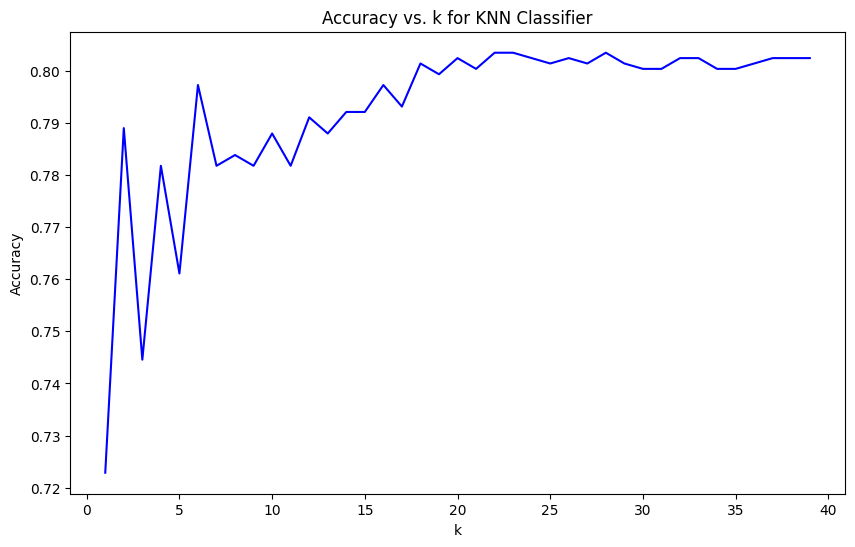

In [ ]:
#knn classifier with k-value graph

import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define the range of k values to be tested
k_values = range(1, 40)

# Initialize an empty list to store the accuracy scores
accuracy_scores = []

# Loop through each k value
for k in k_values:
    # Create a KNN classifier with the current k value
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the model on the training data
    knn.fit(X_train, y_train)

    # Predict the labels of the test data
    y_pred = knn.predict(X_test)

    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Append the accuracy score to the list
    accuracy_scores.append(accuracy)

# Plot the accuracy scores for each k value
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, color='blue')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k for KNN Classifier')
plt.show()

In [ ]:
#knn classifier

clf_knn = KNeighborsClassifier(n_neighbors=10)
clf_knn.fit(X=X_train, y= y_train)

y_pred_train = clf_knn.predict(X_train)
y_pred_test = clf_knn.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))


from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_test, y_pred_test)

print("Confusion Matrix:")
print(cm_rf)

print(classification_report(y_test, y_pred_test))

Train Accuracy: 0.8057951017592273
Test Accuracy: 0.7880041365046536
Confusion Matrix:
[[  0   3   1]
 [  0 756  21]
 [  0 180   6]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.81      0.97      0.88       777
           2       0.21      0.03      0.06       186

    accuracy                           0.79       967
   macro avg       0.34      0.34      0.31       967
weighted avg       0.69      0.79      0.72       967



In [ ]:
#logistic regression

clf_log = LogisticRegression(max_iter=1000)
clf_log.fit(X=X_train, y= y_train)

y_pred_train = clf_log.predict(X_train)
y_pred_test = clf_log.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_test, y_pred_test)

print("Confusion Matrix:")
print(cm_rf)

print(classification_report(y_test, y_pred_test))

Train Accuracy: 0.7961365988271818
Test Accuracy: 0.8035160289555325
Confusion Matrix:
[[  0   4   0]
 [  0 776   1]
 [  0 185   1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.80      1.00      0.89       777
           2       0.50      0.01      0.01       186

    accuracy                           0.80       967
   macro avg       0.43      0.33      0.30       967
weighted avg       0.74      0.80      0.72       967



In [ ]:
#svm algorithm

clf_svm = SVC(kernel='rbf')
clf_svm.fit(X_train, y_train)

y_pred_train = clf_svm.predict(X_train)
y_pred_test = clf_svm.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))


from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_test, y_pred_test)

print("Confusion Matrix:")
print(cm_rf)

print(classification_report(y_test, y_pred_test))

Train Accuracy: 0.7968264918937564
Test Accuracy: 0.8035160289555325
Confusion Matrix:
[[  0   4   0]
 [  0 777   0]
 [  0 186   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.80      1.00      0.89       777
           2       0.00      0.00      0.00       186

    accuracy                           0.80       967
   macro avg       0.27      0.33      0.30       967
weighted avg       0.65      0.80      0.72       967



Here , we can clearly see that SVM CLASSIFIER and LOGISTIC REGRESSION are having the best accuracies when compared to other models.



CONCLUSION

The dataset contained 16 features and 1 target variable for binary classification which determines whether the person is taking the necessary supplements who are affected with anemia. With the given bank data, we implemented Exploratory Data Analysis, Visualized the data, Machine Learning models and evaluated the model. After pre-processsing the data, then applied various classification algorithms on the data which made it clear that SVM and LOGISTIC models have performed pretty good with the same accuracy of 80.35%,compared to other algorithms.